# Logistic Regression Assignment

## 1. Basic Design of the Model
1. Output of the model: 0 or 1 (Binary Classification)
2. Hypothesis to be tested: $Z = W \cdot X + b$
3. $g(x) = \frac{1}{1 + e^{-x}} $ (Signmoid Function)

## 2. Packages Requires
1. numpy: obviously
2. matplotlib: obviously

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = np.load('quickdraw/10k/dataset.npz')

X_train = dataset['X_train']
Y_train = dataset['Y_train']
X_test = dataset['X_test']
Y_test = dataset['Y_test']

(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)


array([0.])

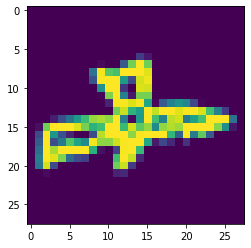

In [ ]:
# X_train, Y_train, X_test, Y_test = load_dataset("./quickdraw/20k/dataset.npz")
# X_train, Y_train, X_test, Y_test = load_dataset("./quickdraw/")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# TODO: Prettify
idx = 3005
plt.imshow(X_train[:, idx].reshape(28, 28))
Y_train[:, idx]

In [ ]:
X_train[:, 0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  19,  20,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 211,   3,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 251,
       255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   6,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        87, 255, 251, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 114, 245,  61,   0,   0,   0,   0,   

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

## 3. Architecture of Model and Algorithm:
For one training example $ X^{(i)} $ :
### Forward Propagation
$$ z^{(i)} = w \cdot x^{(i)} + b $$
$$ \hat y^{(i)} = a^{(i)} = \sigma(z^{(i)}) = sigmoid(z^{(i)}) $$
$$ \mathcal{L}(\hat y^{(i)}, y^{(i)}) = \mathcal{L}(a^{(i)}, y^{(i)}) = -[y^{(i)} \log(a^{(i)}) + (1 - y^{(i)}) \log(1 - a^{(i)})] $$
$$ J = \frac{1}{m} \sum_{i = 1}^m \mathcal{L} (a^{(i)}, y^{(i)}) $$

Write Backprop


In [ ]:
def sigmoid(z):
    """
    Computes the element sigmoid of scalar or numpy array(element wise)
    
    Arguments:
    z: Scalar or numpy array
    
    Returns:
    s: Sigmoid of z (element wise in case of Numpy Array)
    """
    s = 1. / (1 + np.exp(-z))
    return s

In [ ]:
def initialize_parameters(n_x):
    """
    Creates a vector of shape (1, n_x) for W with random numbers, and initializes b to 0 
    
    Arguments:
    n_x: Number of features in each sample of X
    
    Returns:
    w: Initialized Numpy array os shape (1, n_x) (Weight)
    b: Initialized Scalar (bias)
    """

    W = np.zeros((1, n_x))
    b = 0.
    
    return W, b

In [ ]:
def compute_cost(A, Y):
    """
    """
    m = A.shape[1]
    J_ce = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    return np.squeeze(J_ce)
    

In [ ]:
def propagate(W, b, X, Y):
    """
    """
    
    m = X.shape[1]
    
    # forward Propagate
    Z = W @ X + b
    A = sigmoid(Z)
    
    # Calculate Cost
    cost = compute_cost(A, Y)
    
    # Backward Propagate
    dW = (A - Y) @ X.T / m
    db = np.sum(A - Y) / m
    
    assert dW.shape == W.shape
    return dW, db, cost
    

In [ ]:
def predict(W, b, X):
    """
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    A = sigmoid(W @ X + b)
    
    Y_preidction = (A>0.5).astype('int')
    
    return Y_preidction

## Optimization

For a parameter $ \theta $, the gradient descent update rule is given by:
$$ \theta := \theta - \alpha \frac{\partial J}{\partial \theta} $$
where $\alpha$ is the learning rate

In [ ]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_freq=100):
    """
    """
    
    costs = []
    for i in range(num_iterations):
        dW, db, cost = propagate(W, b, X, Y)  

        if i % 100 == 0:
            costs.append(cost)
            
        if print_freq and i % print_freq == 0:
            print(f"Cost after iteration {i}: {cost}")
                
        # Update parameters
        W = W - learning_rate * dW
        b = b - learning_rate * db      

            
    return W, b, costs
        

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.05, print_freq=100):
    """
    """
    
    n_x = X_train.shape[0]
    W, b = initialize_parameters(n_x)
    
    W, b, costs = optimize(W, b, X_train, Y_train, num_iterations, learning_rate, print_freq)
    
    Y_prediction_train = predict(W, b, X_train)
    Y_prediction_test = predict(W, b, X_test)
    
    costs = np.squeeze(costs)
    
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    plt.plot(costs)
    
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()
       

Cost after iteration 0: 0.7097626552483987
Cost after iteration 100: 0.343741556900201
Cost after iteration 200: 0.32914516481565453
Cost after iteration 300: 0.3233571467962758
Cost after iteration 400: 0.31975757147035255
Cost after iteration 500: 0.3170979191949737
Cost after iteration 600: 0.31497351139930274
Cost after iteration 700: 0.3132023849987081
Cost after iteration 800: 0.3116845384356753
Cost after iteration 900: 0.31035804259496197
Cost after iteration 1000: 0.3091815733401467
Cost after iteration 1100: 0.3081260976952292
Cost after iteration 1200: 0.30717040610563767
Cost after iteration 1300: 0.3062985091490693
Cost after iteration 1400: 0.30549803241293544
Cost after iteration 1500: 0.30475918380342
Cost after iteration 1600: 0.30407406593976977
Cost after iteration 1700: 0.30343620477299477
Cost after iteration 1800: 0.3028402180454347
Cost after iteration 1900: 0.3022815766784208
Cost after iteration 2000: 0.3017564294137295
Cost after iteration 2100: 0.301261471456

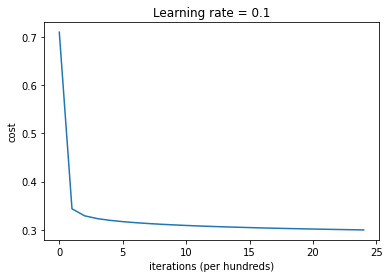

In [ ]:
model(X_train, Y_train, X_test, Y_test, num_iterations=2500, learning_rate=0.1)